In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('tips.csv')

# Display the first few rows of the dataset
print(df.head())
df.describe()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


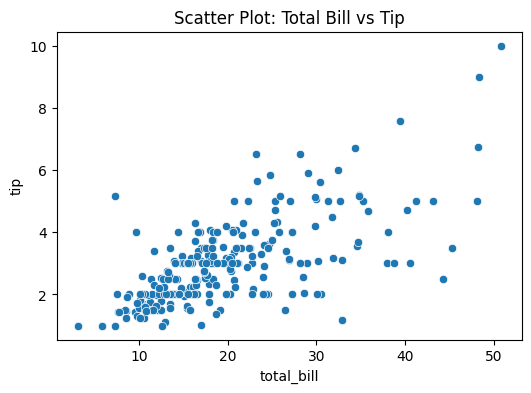

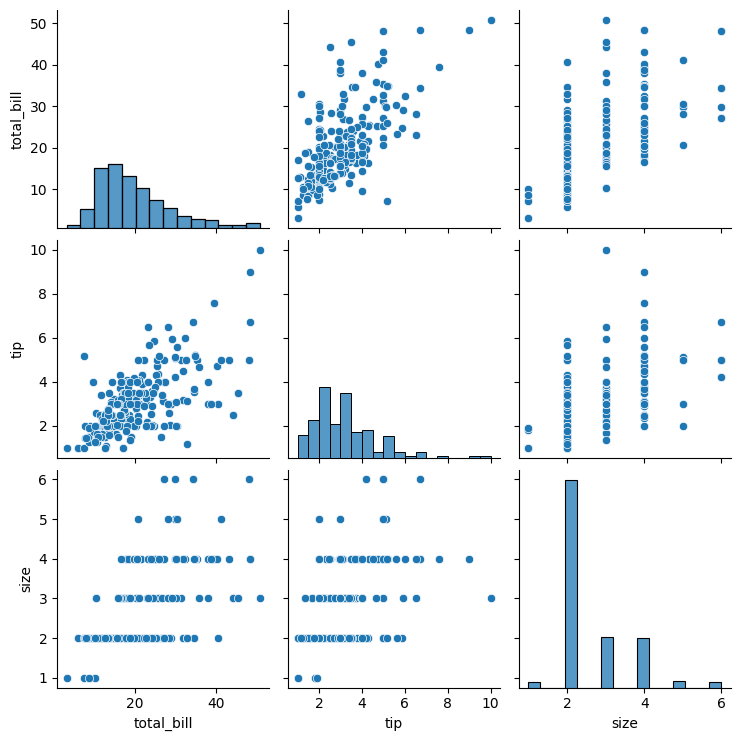

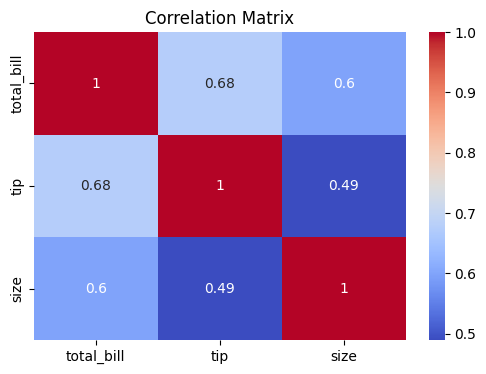

In [2]:
# Scatter plot of total bill vs tip
plt.figure(figsize=(6,4))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Scatter Plot: Total Bill vs Tip')
plt.show()

# Pair plot to check relationships between numerical variables
sns.pairplot(df[['total_bill', 'tip', 'size']])
plt.show()

# Correlation matrix heatmap
corr_matrix = df[['total_bill', 'tip', 'size']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [3]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

# Add constant to the model (for intercept)
X = sm.add_constant(df['total_bill'])
y = df['tip']

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Perform the Rainbow test for linearity
rainbow_stat, rainbow_p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {rainbow_stat}")
print(f"P-value: {rainbow_p_value}")

Rainbow Test Statistic: 1.2291480226129028
P-value: 0.12911921525513964


The Rainbow test helps assess if a linear model is suitable, even in cases where the relationships may not strictly follow linear patterns.

The null hypothesis assumes that the regression model is appropriately linear, while the alternative hypothesis suggests the model does not correctly capture a linear relationship.

When the p-value falls below a certain threshold (e.g., 0.05), we reject the null hypothesis and accept the alternative, indicating that the model isn't well-represented by a linear approach.

Conversely, if the p-value exceeds this threshold (e.g., 0.05), the null hypothesis is retained, implying the regression is sufficiently described as linear.

In this case, since the p-value is above 0.05, we fail to reject the null hypothesis. This implies the regression model aligns well with a linear relationship.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare the dataset for regression (encoding categorical variables)
df_encoded = pd.get_dummies(df, drop_first=True)

# Features (X) and target (y)
X = df_encoded.drop(columns='tip')
y = df_encoded['tip']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data for models like SVR and KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf'),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

# Dictionary to store the results
results = {}

# Train and evaluate each model
for name, model in models.items():
    if name in ['SVR', 'KNN']:  # Use scaled data for SVR and KNN
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

# Display the results
print(results)


{'Linear Regression': {'MSE': 0.7033566017436105, 'R2': 0.43730181943482505}, 'Ridge Regression': {'MSE': 0.7007477213216073, 'R2': 0.4393889716178486}, 'Lasso Regression': {'MSE': 0.5908528649971524, 'R2': 0.5273068720881755}, 'Decision Tree': {'MSE': 1.2551938775510205, 'R2': -0.004178121600921791}, 'Random Forest': {'MSE': 0.9196720148979602, 'R2': 0.2642455218065466}, 'SVR': {'MSE': 0.774938509943386, 'R2': 0.3800349801024778}, 'KNN': {'MSE': 0.9029365714285715, 'R2': 0.27763418350081626}}


Best model is the one with highest R^2 and lowest MSE, so in this case, it is Lasso Regression

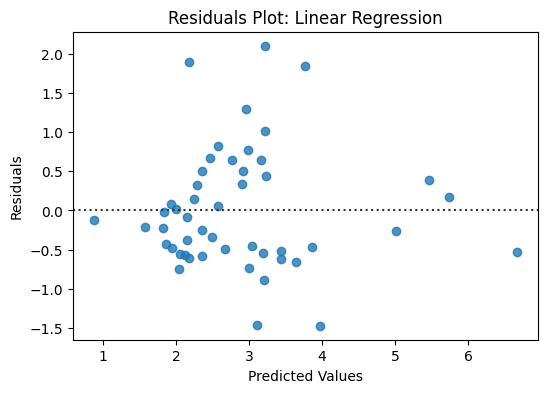

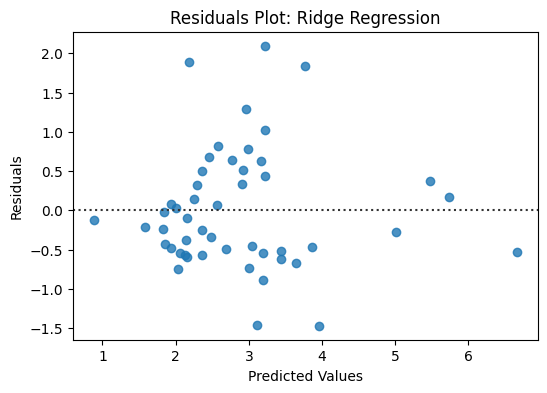

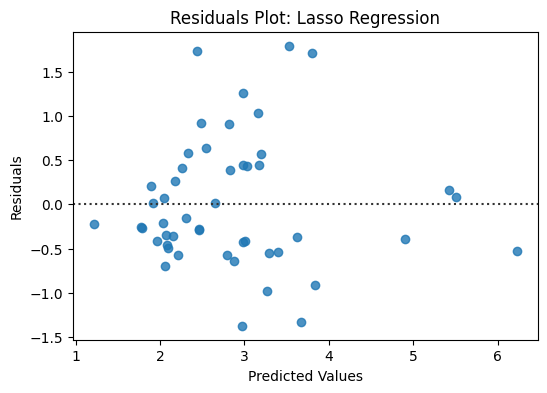

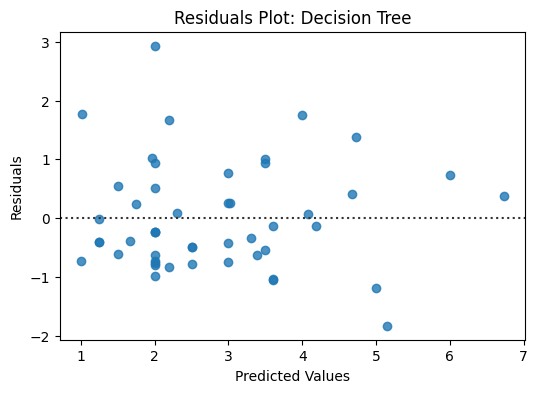

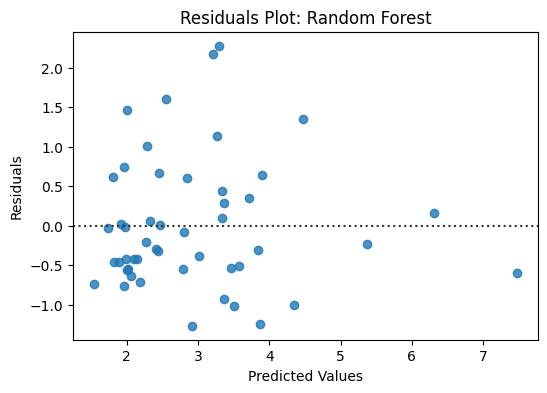

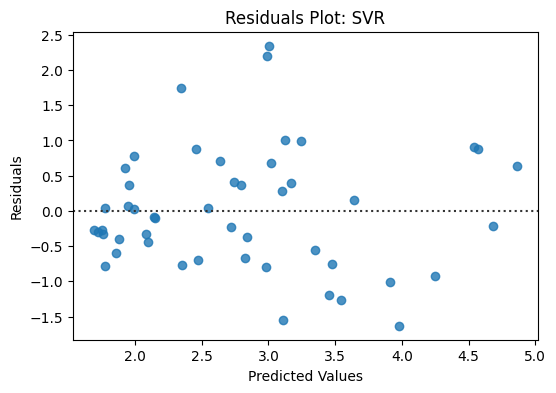

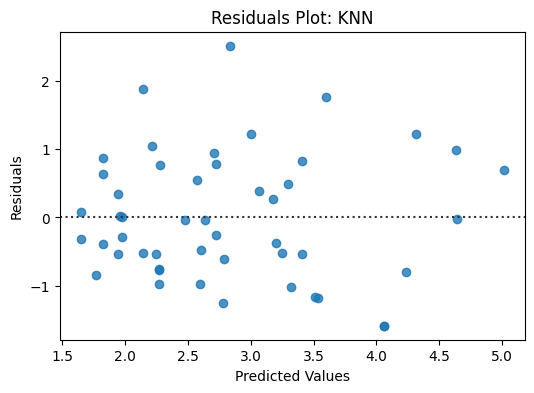

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to store the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf'),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

# Train, predict, and plot residuals for each model
for name, model in models.items():
    if name in ['SVR', 'KNN']:  # Use scaled data for SVR and KNN
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate residuals
    residuals = y_test - y_pred
    
    # Plot the residuals
    plt.figure(figsize=(6, 4))
    sns.residplot(x=y_pred, y=residuals)
    plt.title(f'Residuals Plot: {name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()


from the above, we notice that desicion tree have the least residuals, which means they might be overfitting the data.